# Task_1:

#### Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

#### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

#### If you navigate to this link:

[https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Regarding the aircraft and seat...
1,Not Verified | I travelled with British Airway...
2,Not Verified | Food was lousy. Who ever is pl...
3,✅ Trip Verified | Had the worst experience. Th...
4,✅ Trip Verified | The ground staff were not h...


In [4]:
df

,reviews
0,Not Verified | Regarding the aircraft and seat...
1,Not Verified | I travelled with British Airway...
2,Not Verified | Food was lousy. Who ever is pl...
3,✅ Trip Verified | Had the worst experience. Th...
4,✅ Trip Verified | The ground staff were not h...
...,...
995,✅ Trip Verified | Mumbai to Edinburgh via Lon...
996,✅ Trip Verified | Mumbai to London Heathrow. ...
997,✅ Trip Verified | Delhi to London. Having rea...
998,✅ Trip Verified | When you travel British Airw...


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [6]:
df

,reviews
0,Regarding the aircraft and seat: The business...
1,I travelled with British Airways from Sweden ...
2,Food was lousy. Who ever is planning the Asi...
3,Had the worst experience. The flight from Lon...
4,The ground staff were not helpful. Felt like...
...,...
995,Mumbai to Edinburgh via London. I'm quite su...
996,Mumbai to London Heathrow. Disappointing exp...
997,Delhi to London. Having read many negative r...
998,When you travel British Airways its like you ...


Rule-based approach

- This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

- Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

Data preprocessing steps:

- Cleaning the text

- Tokenization

- Enrichment – POS tagging

- Stopwords removal

- Obtaining the stem words

### Data Cleaning:

In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...
1,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...
2,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...
3,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...
4,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...


### Tokenization:

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

### Enrichment – POS tagging:


Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

### Stopwords removal:

Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

### Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

- NLTK is a leading platform for building Python programs to work with human language data. 

- It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
  with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
  parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [9]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


In [10]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu..."
1,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...,"[(travelled, v), (British, a), (Airways, n), (..."
2,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...,"[(Food, n), (lousy, n), (ever, r), (planning, ..."
3,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo..."
4,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...,"[(ground, n), (staff, n), (helpful, a), (Felt,..."


In [11]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",Regarding aircraft seat business class seat ...
1,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...,"[(travelled, v), (British, a), (Airways, n), (...",travel British Airways Sweden Los Angeles vi...
2,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...,"[(Food, n), (lousy, n), (ever, r), (planning, ...",Food lousy ever plan Asian Hindu Vegetarian ...
3,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo...",bad experience flight London Toronto get del...
4,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...,"[(ground, n), (staff, n), (helpful, a), (Felt,...",ground staff helpful Felt like want rush us ...


In [12]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Regarding the aircraft and seat: The business...,Regarding aircraft seat business class seat ...
1,I travelled with British Airways from Sweden ...,travel British Airways Sweden Los Angeles vi...
2,Food was lousy. Who ever is planning the Asi...,Food lousy ever plan Asian Hindu Vegetarian ...
3,Had the worst experience. The flight from Lon...,bad experience flight London Toronto get del...
4,The ground staff were not helpful. Felt like...,ground staff helpful Felt like want rush us ...
...,...,...
995,Mumbai to Edinburgh via London. I'm quite su...,Mumbai Edinburgh via London quite surprised ...
996,Mumbai to London Heathrow. Disappointing exp...,Mumbai London Heathrow Disappointing experie...
997,Delhi to London. Having read many negative r...,Delhi London read many negative review Briti...
998,When you travel British Airways its like you ...,travel British Airways like lucky able Briti...


### Sentiment Analysis using VADER


VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

- Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [13]:
!pip install vaderSentiment

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Regarding the aircraft and seat: The business...,Regarding the aircraft and seat The business ...,"[(Regarding, v), (aircraft, n), (seat, v), (bu...",Regarding aircraft seat business class seat ...,0.8676,Positive
1,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...,"[(travelled, v), (British, a), (Airways, n), (...",travel British Airways Sweden Los Angeles vi...,-0.7902,Negative
2,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...,"[(Food, n), (lousy, n), (ever, r), (planning, ...",Food lousy ever plan Asian Hindu Vegetarian ...,-0.5574,Negative
3,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo...",bad experience flight London Toronto get del...,0.1546,Neutral
4,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...,"[(ground, n), (staff, n), (helpful, a), (Felt,...",ground staff helpful Felt like want rush us ...,0.6124,Positive


In [15]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    524
Negative    370
Neutral     106
Name: Analysis, dtype: int64

# Visualization:

([<matplotlib.patches.Wedge at 0x26b21e25eb0>,
 [Text(-0.08285944828829273, 1.096874793141569, 'Positive'),
  Text(-0.2802478556160989, -1.0637016214251902, 'Negative'),
  Text(1.2758351325693755, -0.44129889474332934, 'Neutral')],
 [Text(-0.04519606270270512, 0.598295341713583, '52.4%'),
  Text(-0.15286246669969028, -0.58020088441374, '37.0%'),
  Text(0.8033036019881252, -0.2778548596532074, '10.6%')])

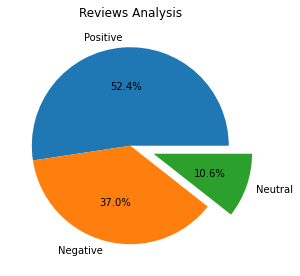

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [17]:
df.to_csv("BA_reviews.csv")

# TASK 1 OVER.